### SEABORN COUNTPLOT
seaborn.countplot(*, x=None, y=None, data=None, order=None, orient=None, color=None)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv('../data/pokemon.csv')
print(pokemon.shape)
print(pokemon.head(10))

(807, 14)
   id     species  generation_id  height  weight  base_experience type_1  \
0   1   bulbasaur              1     0.7     6.9               64  grass   
1   2     ivysaur              1     1.0    13.0              142  grass   
2   3    venusaur              1     2.0   100.0              236  grass   
3   4  charmander              1     0.6     8.5               62   fire   
4   5  charmeleon              1     1.1    19.0              142   fire   
5   6   charizard              1     1.7    90.5              240   fire   
6   7    squirtle              1     0.5     9.0               63  water   
7   8   wartortle              1     1.0    22.5              142  water   
8   9   blastoise              1     1.6    85.5              239  water   
9  10    caterpie              1     0.3     2.9               39    bug   

   type_2  hp  attack  defense  speed  special-attack  special-defense  
0  poison  45      49       49     45              65               65  
1  pois

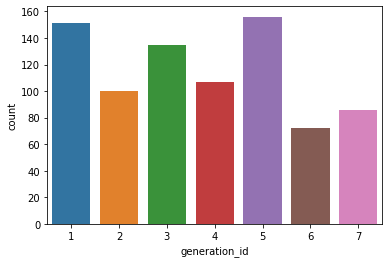

In [3]:
sb.countplot(data = pokemon, x = 'generation_id');

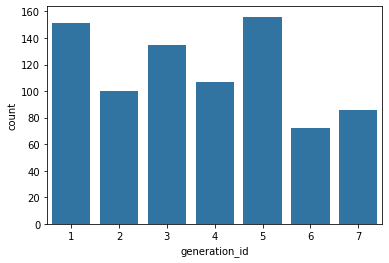

In [4]:
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color);

### MATPLOTLIB BAR
matplotlib.pyplot.bar(x, y, width=0.8, bottom=None, *, align='center', data=None)

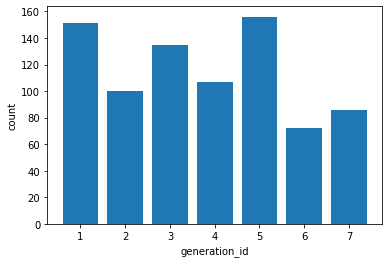

In [5]:
x = pokemon['generation_id'].unique()
y = pokemon['generation_id'].value_counts(sort = False)
plt.bar(x, y)
plt.xlabel('generation_id')
plt.ylabel('count')
plt.show()

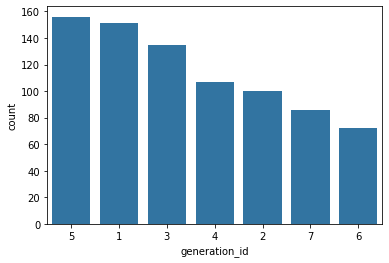

In [6]:
# Statically order the bars in the barchart
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = [5, 1, 3, 4, 2, 7, 6]);

# Dynamically order bars in the barchart
freq = pokemon['generation_id'].value_counts()
gen_order = freq.index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order);

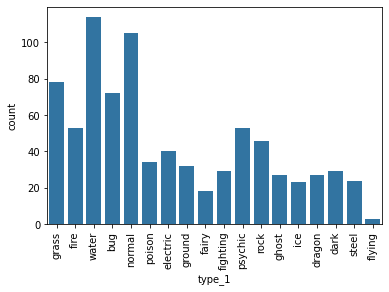

In [7]:
# Rotate category labels
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

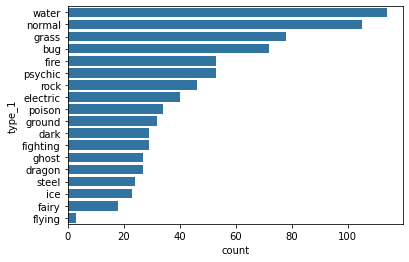

In [8]:
# Rotate the axes for horizontal barchart
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

### ABSOLUTE VS. RELATIVE FREQUENCY

#### MELT
Data-wrangling function to unpivot the DataFrame:<br>
DataFrame.melt(id_vars, value_vars, var_name, value_name, col_level, ignore_index)

#### ABSOLUTE FREQUENCY

In [9]:
# Melt the dataframe
pkmn_types = pokemon.melt(id_vars = ['id', 'species'],
                          value_vars = ['type_1', 'type_2'],
                          var_name = 'type_level',
                          value_name = 'type')
print(pkmn_types.head(10))

   id     species type_level   type
0   1   bulbasaur     type_1  grass
1   2     ivysaur     type_1  grass
2   3    venusaur     type_1  grass
3   4  charmander     type_1   fire
4   5  charmeleon     type_1   fire
5   6   charizard     type_1   fire
6   7    squirtle     type_1  water
7   8   wartortle     type_1  water
8   9   blastoise     type_1  water
9  10    caterpie     type_1    bug


In [10]:
# Count frequency of occurrance of 'type' value
type_counts = pkmn_types['type'].value_counts()
print(type_counts)

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64


In [11]:
# Get unique values of 'type' in decreasing frequency
type_order = type_counts.index
print(type_order)

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')


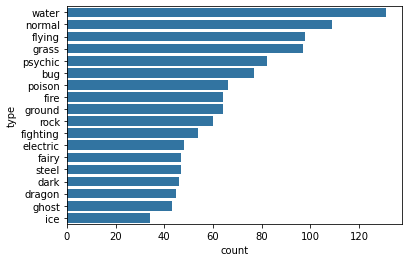

In [12]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

#### RELATIVE FREQUENCY

In [13]:
# Return sum of all non-NaN values
n_pokemon = pkmn_types['type'].value_counts().sum()

# Return the highest frequency of 'types'
max_type_count = type_counts[0]

# Return the maximum proportion of the highst frequency 'type'
max_prop = max_type_count / n_pokemon
print(max_prop)

0.10808580858085809


In [14]:
# Create an array of evenly spaced proportioned values
tick_props = np.arange(0, max_prop, .02)
print(tick_props)

[0.   0.02 0.04 0.06 0.08 0.1 ]


In [15]:
# Create a list of string values representing the numerical list
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
print(tick_names)

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']


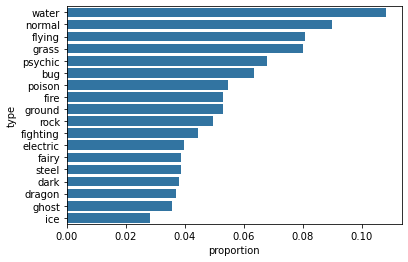

In [16]:
# Create plot and modify tick locations and labels
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

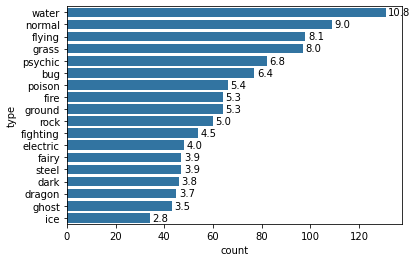

In [17]:
# Print text on bars of plot
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_str = '{:0.1f}'.format(100 * count / n_pokemon)
    plt.text(count + 1, i, pct_str, va = 'center')

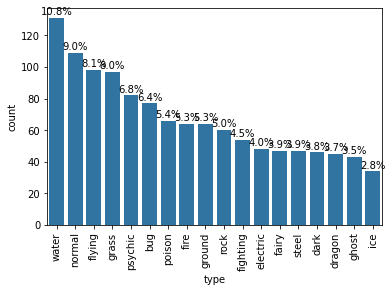

In [18]:
# Print text below bars of vertical plot
sb.countplot(data = pkmn_types, x = 'type', color = base_color, order = type_order);

# Get current tick location and labels
locs, labels = plt.xticks(rotation = 90)

#Loop through each pair of loc/labels
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_str = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(loc, count + 2, pct_str, ha = 'center', color = 'black')

In [19]:
# Resize the plot
from matplotlib import rcParams

# Specify size in inches for x, y axes
rcParams['figure.figsize'] = 12, 4

### COUNTING MISSING DATA
pandas.DataFrame.isna()<br>
pandas.DataFrame.isnull()

In [20]:
sales = pd.read_csv('../data/sales_data.csv')
print(sales.head(10))

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1  05/03/2010        46.50       2.625        NaN        NaN   
5      1  12/03/2010        57.79       2.667        NaN        NaN   
6      1  19/03/2010        54.58       2.720        NaN        NaN   
7      1  26/03/2010        51.45       2.732        NaN        NaN   
8      1  02/04/2010        62.27       2.719        NaN        NaN   
9      1  09/04/2010        65.86       2.770        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       Tru

In [21]:
print(sales.shape)

(8190, 12)


In [22]:
print(sales.isnull())

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0     False  False        False       False       True       True       True   
1     False  False        False       False       True       True       True   
2     False  False        False       False       True       True       True   
3     False  False        False       False       True       True       True   
4     False  False        False       False       True       True       True   
...     ...    ...          ...         ...        ...        ...        ...   
8185  False  False        False       False      False      False      False   
8186  False  False        False       False      False      False      False   
8187  False  False        False       False      False      False      False   
8188  False  False        False       False      False      False      False   
8189  False  False        False       False      False      False      False   

      MarkDown4  MarkDown5    CPI  Unem

In [23]:
print(sales.isnull().sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


In [24]:
# Drop columns that contain no missing data
na_counts = sales.drop(['Date', 'Temperature', 'Fuel_Price'], axis = 1).isnull().sum()
print(na_counts)

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


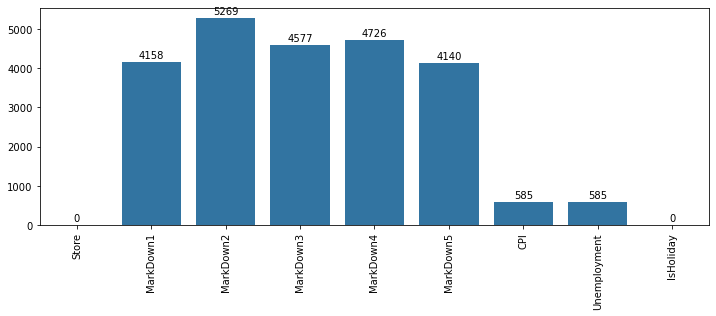

In [25]:
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90)
for i in range(na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count + 300, count, ha = 'center', va = 'top')

### PIE CHARTS AND DONUT CHARTS
matplotlib.pyplot.pie(x_data, labels, colors, startangle, counterclock, wedgeprops)

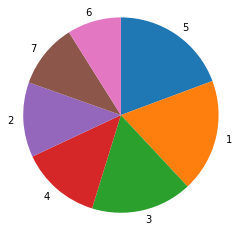

In [26]:
# Create pie chart
sorted_counts = pokemon['generation_id'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square');

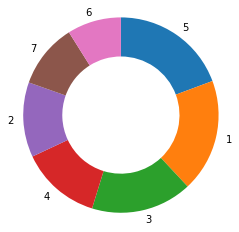

In [27]:
# Create donut chart
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,\
        wedgeprops = {'width': .4});
plt.axis('square');

### HISTOGRAMS
Used for *quantitative* data

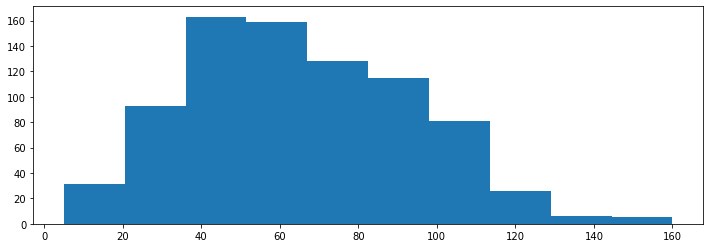

In [28]:
# Make historgram with default bins (10)
plt.hist(data = pokemon, x = 'speed');

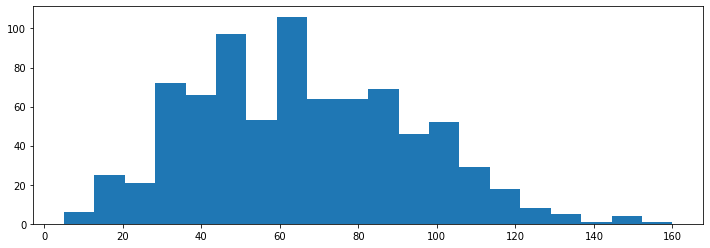

In [29]:
# Specified number of bins
plt.hist(data = pokemon, x = 'speed', bins = 20);

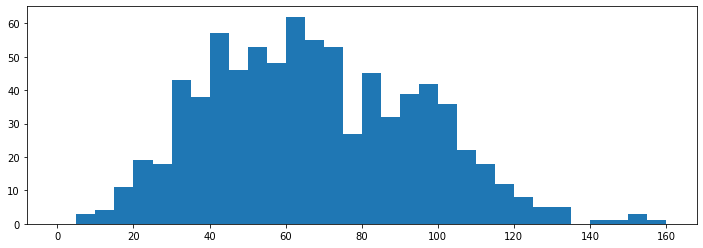

In [30]:
# Dynamic number of bins
bins = np.arange(0, pokemon['speed'].max() + 5, 5)  # Add bin width to upper limit
plt.hist(data = pokemon, x = 'speed', bins = bins);

#### PLOTTING 2 HISTOGRAMS SIDE-BY-SIDE

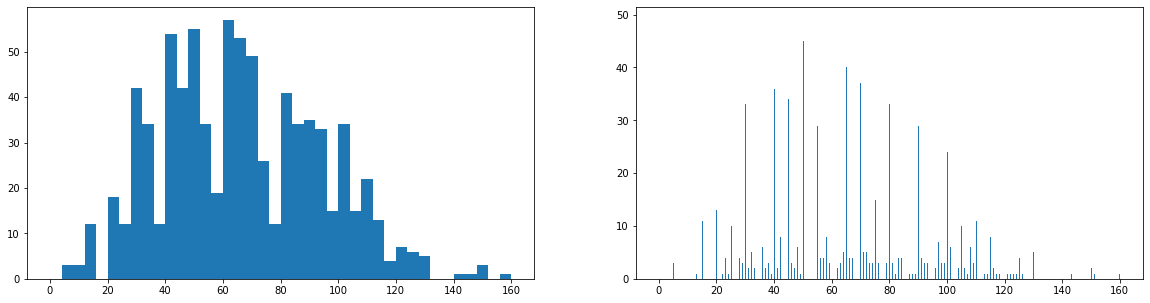

In [31]:
# Create larger figure size
plt.figure(figsize = [20, 5])

# Create histogram on left with too-large bin size
# 1 row, 2 columns, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max() + 4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins)

# Create right histogram on right with too-small bin size
# 1 row, 2 columns, subplot 2
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max() + 1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

### FIGURES, AXES, AND SUBPLOTS
Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1.

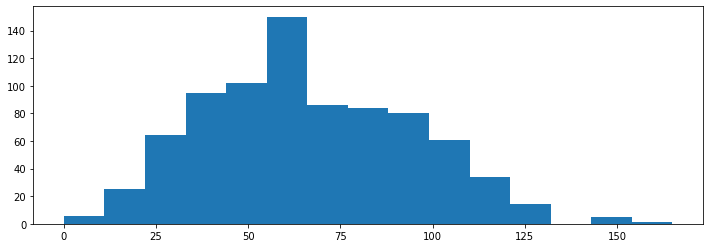

In [32]:
bin_width = 11
bins = np.arange(0, pokemon['speed'].max() + bin_width, bin_width)
plt.hist(data = pokemon, x = 'speed', bins = bins);

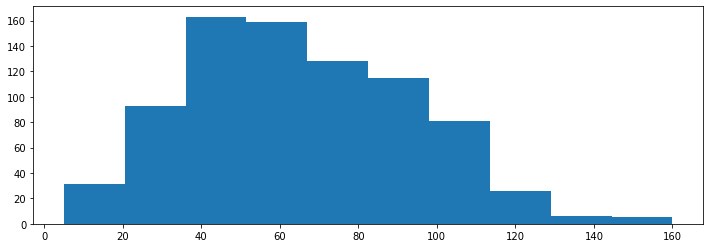

In [33]:
# Create new figure
fig = plt.figure()

# Add dimension of axes to figure
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = pokemon, x = 'speed');

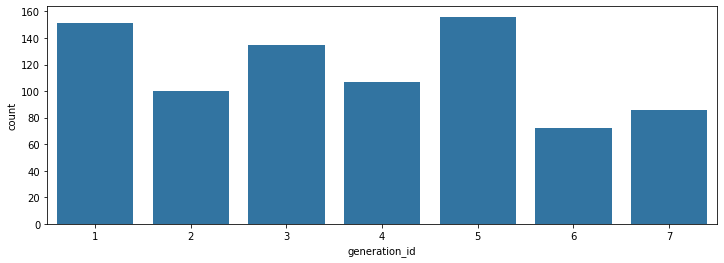

In [34]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, ax = ax);

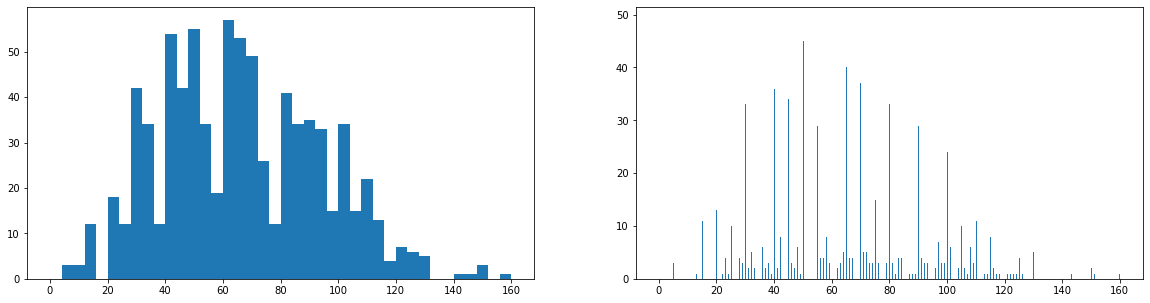

In [35]:
# Resize chart for 2 side-by-side subplots
plt.figure(figsize = [20, 5])

# Histogram on left, bins too large
# 1 row, 2 columns, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max() + 4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# Histogram on right
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max() + 1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

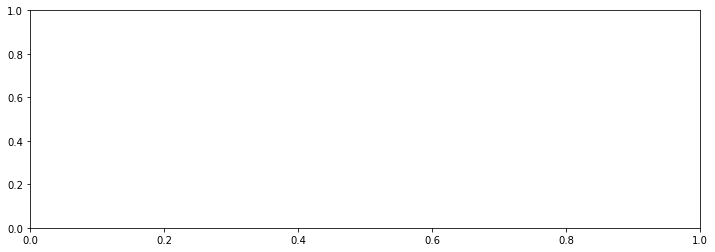

In [36]:
# How to retrieve current axes
ax = plt.gca()

# How to retrieve all axes
axes = fig.get_axes()

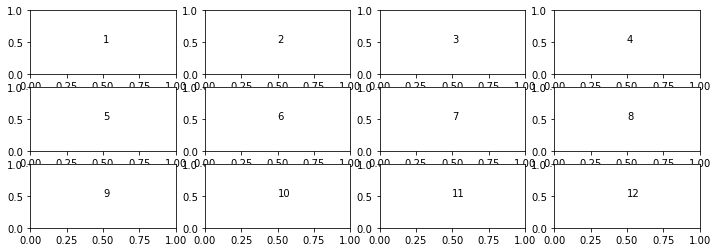

In [37]:
# Generate a grid of subplots
fig, axes = plt.subplots(3, 4) # 3 rows, 4 columns
axes = axes.flatten() # reshape from 3x4 array to 12-element vector
for i in range(len(axes)):
    plt.sca(axes[i])
    plt.text(.5, .5, i + 1) # Print subplot index number in center of plot

### PLOTTING DISCRETE DATA

In [38]:
die_rolls = pd.read_csv('../data/die_rolls.csv')
die_rolls.head()

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9


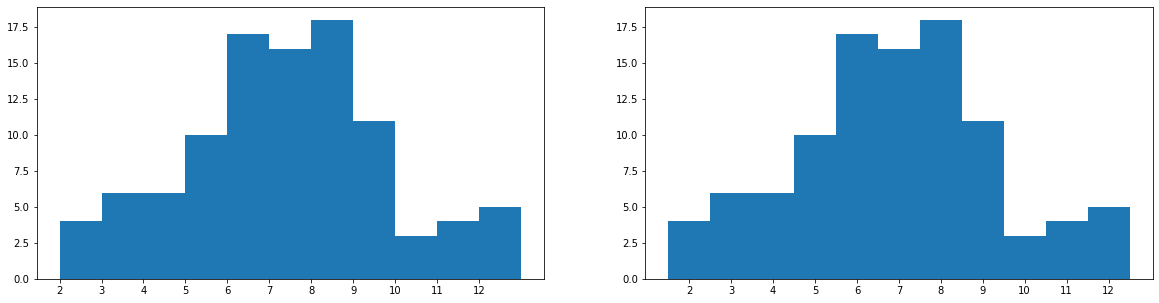

In [39]:
plt.figure(figsize = [20, 5]);

# Histogram on left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12 + 1.1, 1)
plt.hist(data = die_rolls, x = 'Sum', bins = bin_edges)
plt.xticks(np.arange(2, 12 + 1, 1));

# Histogram on right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12 + 1.5, 1)
plt.hist(data = die_rolls, x = 'Sum', bins = bin_edges)
plt.xticks(np.arange(2, 12 + 1, 1));

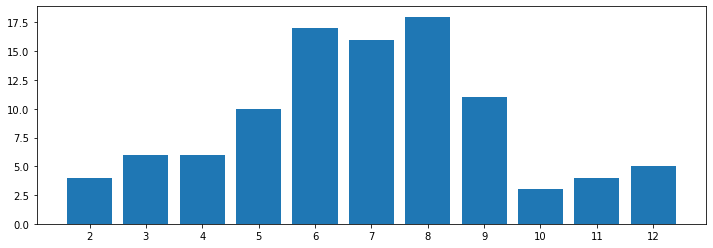

In [40]:
# Make gaps between bars
bin_edges = np.arange(1.5, 12 + 1.5, 1)
plt.hist(data = die_rolls, x = 'Sum', bins = bin_edges, rwidth = .8) # Bars take 80% of space allocated for bin
plt.xticks(np.arange(2, 12 + 1, 1));

### STATISTICS, OUTLIERS, AND AXIS LIMITS

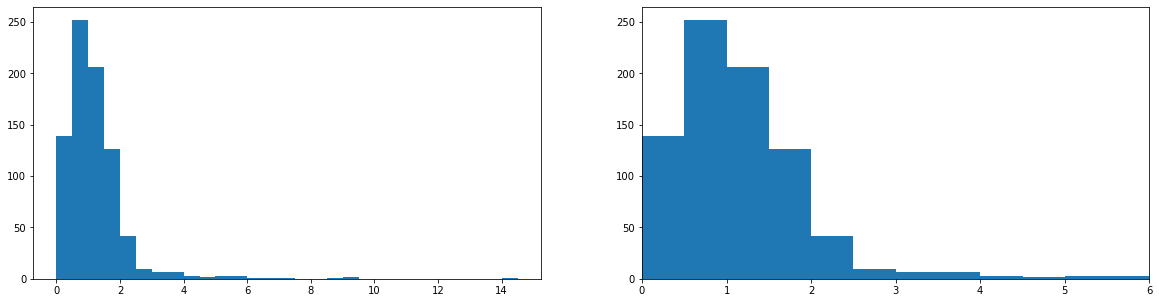

In [41]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['height'].max() + .5, .5)
plt.hist(data = pokemon, x = 'height', bins = bins)

# Function takes tuple specifying lower/upper limit of the scale
plt.subplot(1, 2, 2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0, 6));

### SCALES AND TRANSFORMATIONS

In [42]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

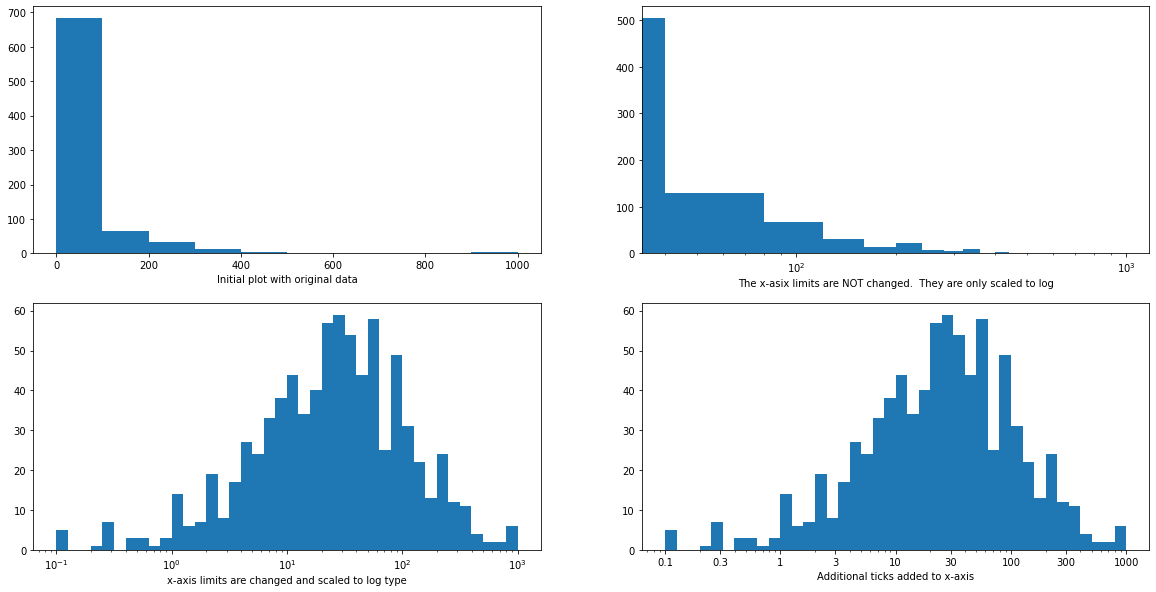

In [43]:
plt.figure(figsize = [20, 10])
#plt.subplots_adjust(hspace= .5)

# Full data, no scaling
plt.subplot(2, 2, 1)
plt.hist(data = pokemon, x = 'weight')
plt.xlabel('Initial plot with original data')

# Scale axis to log scale, still linear bins
plt.subplot(2, 2, 2)
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xlabel('The x-asix limits are NOT changed.  They are only scaled to log');

# Axis Transformation and logarithmic bins
plt.subplot(2, 2, 3)
bins = 10 ** np.arange(-1, 3 + .1, .1)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xlabel('x-axis limits are changed and scaled to log type');

# Increase number of x ticks
plt.subplot(2, 2, 4)
bins = 10 ** np.arange(-1, 3 + .1, .1)

# Create ticks
ticks = [.1, .3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(i) for i in ticks]

plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')

# Must call after xscale()
plt.xticks(ticks, labels)
plt.xlabel('Additional ticks added to x-axis');

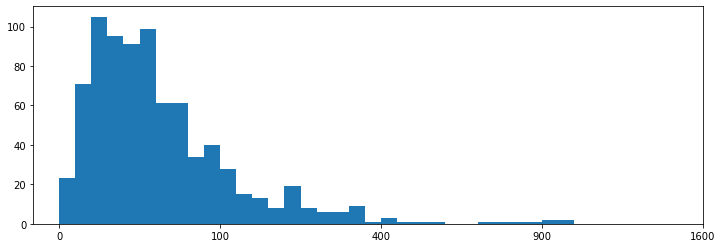

In [44]:
# Custom scaling the given data series instead of using a built-in scale like log
def sqrt_trans(x, inverse = False):
    """ Transform helper function """
    if inverse:
        return x ** 2
    else:
        return np.sqrt(x)
    
# Resize bins
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max()) + 1, 1)

# Plot data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify tick locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max()) + 10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, True).astype(int));